In [1]:
import numpy as np
import dense_basis as db
import matplotlib.pyplot as plt
from astropy.table import Table
import time

print('using versions:')
print('numpy: ',np.__version__)
print('dense basis: ',db.__version__)

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
using versions:
numpy:  1.16.4
dense basis:  0.1.8


In [2]:
db.set_plot_style()

In [3]:
galaxy_params = Table.read('JAGUAR_cat_basicsimsrcs_v3.fits')
galaxy_params

ID,RA,DEC,redshift,mStar,sSFR,tau,tauV_eff,max_stellar_age,metallicity,HST_F435W_fnu,HST_F606W_fnu,HST_F775W_fnu,HST_F814W_fnu,HST_F850LP_fnu,HST_F105W_fnu,HST_F125W_fnu,HST_F140W_fnu,HST_F160W_fnu,IRAC_3p6_fnu,IRAC_4p5_fnu,NRC_F070W_fnu,NRC_F090W_fnu,NRC_F115W_fnu,NRC_F150W_fnu,NRC_F200W_fnu,NRC_F277W_fnu,NRC_F356W_fnu,NRC_F444W_fnu,NRC_F410M_F444W_fnu,NRC_F140M_fnu,NRC_F162M_fnu,NRC_F182M_fnu,NRC_F210M_fnu,NRC_F250M_fnu,NRC_F300M_fnu,NRC_F335M_fnu,NRC_F360M_fnu,NRC_F410M_fnu,NRC_F430M_fnu,NRC_F460M_fnu,NRC_F480M_fnu,luminosity_distance,Re_circ,Re_maj,axis_ratio,sersic_n,position_angle,MUV,beta,SFR_10,SFR_100,A1500,log_OH,logUs,C4_1548_1550_EW,O3_1660_EW,O3_1666_EW,C3_1907_1909_EW,O2_3726_3729_EW,HBaB_4861_EW,O3_4959_EW,O3_5007_EW,HBaA_6563_EW,C4_1548_flux,C4_1551_flux,O3_1661_flux,O3_1666_flux,C3_1907_flux,C3_1909_flux,O2_3726_flux,O2_3729_flux,Ne3_3869_flux,O3_4363_flux,HBaB_4861_flux,O3_4959_flux,O3_5007_flux,HBaA_6563_flux,N2_6584_flux,S2_6716_flux,S2_6731_flux
int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
309706,53.24449012392076,-27.805703698168408,1.5136213359961121,11.052468,-11.889757,8.322971,0.012315699,9.381358,-0.5354473607318297,113.51213,460.05054,2160.2456,2674.5918,4339.805,8918.163,13686.11,16090.222,18347.402,31856.543,32056.396,1202.1956,4325.724,11787.73,17803.814,24001.031,29437.87,31981.162,32501.812,33243.707,16532.334,19412.018,22462.178,25137.271,28642.582,30178.67,31366.47,31715.822,34492.863,34404.96,30455.215,29263.723,11039.631,1.757824,0.30342,0.468506,0.436625,329.599505,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309710,53.0635988976,-27.878166312100607,1.521827396074973,9.530622,-18.104128,7.5046544,0.9657444,8.992102,0.10411531194815196,3.5508556,16.303907,55.21339,66.268936,108.28084,253.56815,382.7341,437.88614,488.93475,850.75745,939.7967,34.97874,109.0444,336.75436,476.3802,620.3528,788.26324,857.3137,944.2316,959.2286,449.44403,509.18185,578.97656,650.9807,750.9917,820.8084,854.1793,825.229,987.33575,1029.6499,882.60126,860.66754,11113.534,0.850806,0.162604,0.382048,1.956619,232.218343,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309713,53.15202591601325,-27.839024604720432,1.5326612026665323,10.78258,-11.88192,8.3847,1.5018191,9.434726,-0.04318983555194756,4.508774,32.061745,249.9087,324.3821,564.2264,1369.1461,2518.3904,3237.189,3950.3347,10756.371,12235.767,123.17397,549.0967,2015.055,3772.7683,6024.4673,9103.481,10855.892,12298.424,12478.457,3351.4172,4310.193,5349.7847,6540.126,8350.58,9754.187,10481.188,10605.794,12811.647,13307.774,11553.908,11198.504,11211.227,0.839617,0.219848,0.203462,2.500951,156.168468,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20
309716,53.134716049201316,-27.81118043888548,1.5453416977964467,10.464529,-13.288876,8.161345,1.579596,9.350247,-0.21578372213540803,2.9935777,26.137669,154.37184,197.35062,337.92032,794.5962,1431.4022,1828.4578,2216.6804,5854.4053,6614.4204,78.64962,331.11108,1155.2537,2121.0806,3329.382,4962

In [4]:
#bagpipes_fits = Table.read('bagpipes_test_v1.fits')
bagpipes_fits = Table.read('bagpipes_snr30_v1.fits')
bagpipes_fits

#ID,delayed:age_16,delayed:age_50,delayed:age_84,delayed:massformed_16,delayed:massformed_50,delayed:massformed_84,delayed:metallicity_16,delayed:metallicity_50,delayed:metallicity_84,delayed:tau_16,delayed:tau_50,delayed:tau_84,dust:Av_16,dust:Av_50,dust:Av_84,redshift_16,redshift_50,redshift_84,stellar_mass_16,stellar_mass_50,stellar_mass_84,formed_mass_16,formed_mass_50,formed_mass_84,sfr_16,sfr_50,sfr_84,ssfr_16,ssfr_50,ssfr_84,nsfr_16,nsfr_50,nsfr_84,mass_weighted_age_16,mass_weighted_age_50,mass_weighted_age_84,tform_16,tform_50,tform_84,tquench_16,tquench_50,tquench_84,UV_colour_16,UV_colour_50,UV_colour_84,VJ_colour_16,VJ_colour_50,VJ_colour_84,input_redshift,log_evidence,log_evidence_err,chisq_phot,n_bands
bytes2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2.215445871379641,2.9887874813263213,3.8329854159637775,11.284302382972387,11.359504804704976,11.424070897592097,0.16812535955021152,0.26526292350176134,0.4338360779033356,0.1962612010696663,0.37163216124886955,0.5537466163010019,0.046493978340132344,0.1470360180837603,0.2988389418236559,1.4070261503879804,1.4618514834826928,1.5095303202508834,11.020902769450098,11.08367137819839,11.137108607941881,11.284302382972387,11.359504804704976,11.424070897592097,0.14091632006001334,2.026391679231515,4.318564302214339,-11.876158050647696,-10.791866266033525,-10.475996575590132,-2.4958821071219712,-1.4417360912150983,-1.1174925467198298,1.7816959647721973,2.2527980898680466,2.7625320620755573,1.4694366164183925,2.0259714808009845,2.5425805980568468,3.392895754306198,3.7466436715958356,3.9978983943687467,3.157831831865881,3.5575625775558324,4.126416132985673,0.34528535775985086,0.39653120781858575,0.46340768245123254,0.0,505.1373811319521,0.20084282370255482,3.273574968213744,12.0
2,1.0866406615595714,1.2920595299671254,1.872647879594311,9.601678836751992,9.634397164384362,9.677574167292317,0.3528366163473682,0.598718958896544,1.040268615468449,0.1172950319674479,0.14578887712685984,0.2445000215262502,0.048010409851926374,0.18296571657256222,0.44279030877956016,1.4999225672888254,1.5304571756400493,1.5632320545385252,9.375984423259034,9.412663203549279,9.446107737319775,9.601678836751992,9.634397164384362,9.677574167292317,0.02013923793757211,0.06909064684865626,0.14926231286668196,-11.091993765181222,-10.577490380093629,-10.278498656021204,-1.7018168022590265,-1.1905902347626665,-0.898043020639796,0.8270796527593687,1.0107948864145921,1.3988219119905159,2.730121085299733,3.121554532594783,3.2877858983873263,3.841173323648573,3.986982835437028,99.0,3.044742098281139,3.3334370441488623,3.6361221486225666,0.4419660605490103,0.4921927801112691,0.53100016127101,0.0,544.5608820233316,0.20747755146299315,8.112630924895992,12.0
3,2.294446274203301,2.8965149633904055,3.7851337352387926,10.879850729442603,10.93870197094835,10.992273102708921,1.2401556309096853,1.719875767747888,2.137659807315937,0.16952525701126855,0.2832901517687368,0.4281292720859476,0.099395992790698,0.21990128968353895,0.3535817584240343,1.4608516801838525,1.4931610310522712,1.5257755695425468,10.618140800952835,10.66913099408161,10.714333744182158,10.879850729442603,10.93870197094835,10.992273102708921,0.004872193858051038,0.14143866908229538,0.4758163383665738,-12.959963924794994,-11.529498243458605,-11.006788259741127,-3.5994798139109028,-2.1702928881772925,-1.6589786264460387,1.8969032280596863,2.3517972180425404,2.951911521026353,1.2611556447733911,1.8794718458137365,2.3298142541119446,2.8220147084549088,3.178208736025507,3.4521514898305705,4.194515614138579,4.857320110162679,5.432281418294851,0.988907281632972,1.0381756333123144,1.081

In [5]:
db_fits = Table.read('db_fits_v2_snr_30.fits')
db_fits

mstar_50,mstar_16,mstar_84,sfr_50,sfr_16,sfr_84,Av_50,Av_16,Av_84,redshift_50,redshift_16,redshift_84
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11.15550000000239,11.068500000002361,11.15650000000239,-0.17749999999805555,-0.5514999999981804,0.20450000000207202,0.10350000000000001,0.10250000000000001,0.1695,1.6555070632617268,1.6285070632617298,1.671507063261725
9.550500000001854,9.522500000001845,9.587500000001866,-1.6694999999985538,-3.0634999999990193,-1.0604999999983504,0.2645,0.1225,0.4275,1.6155070632617312,1.5845070632617346,1.6555070632617268
10.76550000000226,10.76550000000226,10.76650000000226,-1.9174999999986366,-1.9174999999986366,-1.8864999999986263,0.5575,0.5505,0.5575,1.5515070632617383,1.5505070632617384,1.5515070632617383
10.49950000000217,10.491500000002167,10.500500000002171,-2.1834999999987255,-2.1834999999987255,-2.152499999998715,0.5575,0.5565,0.8514999999999999,1.5515070632617383,1.5505070632617384,1.5925070632617337
10.714500000002243,10.684500000002233,10.756500000002257,-0.4684999999981527,-1.7814999999985912,-0.4644999999981514,0.5575,0.5105,0.7525,1.5425070632617393,1.5295070632617407,1.6285070632617298
10.420500000002145,10.37850000000213,10.421500000002146,-0.7634999999982512,-1.9524999999986483,-0.7594999999982499,0.5125,0.5105,0.7525,1.5305070632617406,1.5295070632617407,1.5845070632617346
10.454500000002156,10.453500000002157,10.470500000002161,-0.39249999999812735,-1.4414999999984777,-0.38949999999812634,0.7454999999999999,0.7404999999999999,0.8514999999999999,1.6245070632617302,1.6235070632617303,1.6505070632617274
10.740500000002251,10.724500000002246,10.763500000002258,-1.6534999999985485,-1.7334999999985752,-0.7104999999982335,0.5495,0.4305,0.6755,1.6255070632617301,1.5855070632617345,1.6515070632617272
9.994500000002002,9.982500000001998,10.032500000002015,-1.92749999999864,-2.241499999998745,-0.8894999999982933,0.4375,0.41050000000000003,0.7104999999999999,1.6735070632617248,1.6415070632617283,1.6795070632617242


In [6]:
gael_fits = Table.read('fspsdynesty_snr30_v2.fits')
gael_fits

ID_src,redshift_16,redshift_50,redshift_84,age_16,age_50,age_84,tau_16,tau_50,tau_84,Z_16,Z_50,Z_84,dust_16,dust_50,dust_84,stellar_mass_16,stellar_mass_50,stellar_mass_84,log_f_16,log_f_50,log_f_84,sfr100_16,sfr100_50,sfr100_84
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,1.4736625327658524,1.5054236559718757,1.5474014648842087,1.6806557122919614,2.384715438337273,3.124614029696369,0.20772133405669824,0.3332419881249823,0.49728418661975127,0.21451832257958942,0.3565703979191366,0.5619936586392996,0.04620887125762491,0.13229456696111289,0.25026578758204954,11.195867055323935,11.26434656166386,11.332444971579694,-8.52313637642024,-6.174386022038284,-4.556857138911491,1.7681067816240563,3.994550922666626,6.412189191472946
2,1.5473080803177612,1.5848095397962898,1.6264560123512743,1.0219783100026008,1.3361990476824797,1.6877132783960986,0.1448240023940586,0.19750494785017264,0.2551672058308371,0.5904581914292143,1.0026877074425737,1.418886261913078,0.11091290288987275,0.29273523016787806,0.5015478546377119,9.67532737765303,9.697990145162615,9.718936193558765,-5.417269913845102,-4.536888065091665,-3.7402576903178577,0.1471021304116307,0.23620735779677926,0.3780085986085087
3,1.5026138559662794,1.5336585839065928,1.5703405182965022,2.0034077289297265,2.5600685629780524,3.2963280352740614,0.17229534305857386,0.256793556988417,0.3903601010165465,0.626834800004159,1.3189099895881917,2.0728306882102694,0.2296041283917168,0.39180857144339204,0.6221382628559495,10.884189127270838,10.940300218043966,10.99768566127728,-5.617861881052097,-4.609645765827966,-3.88703218280936,0.019349952681002144,0.2811859271328376,0.8620772969495365
4,1.5065025766692512,1.544544594338621,1.593920758460778,2.150843450846626,2.7299882426777007,3.601875668104178,0.25042576660219584,0.34453574941483595,0.4617286862269464,0.39908785355264353,1.1045930870716478,1.904170189111463,0.1641134491085609,0.37379865593814593,0.74230873219938,10.62009715757228,10.675563695817676,10.73946230559393,-4.2214562548484,-3.7346521898025173,-3.2878719083038996,0.12167220990478883,0.40337714807747727,0.9723424383484087
5,1.5163303436265296,1.547847236765374,1.5855019070677585,1.7947809245538093,2.299880512491648,3.372857085314731,0.17077742559788506,0.24854345570577874,0.41111471173444336,0.5858504035427613,1.033204452292765,1.6786764071843683,0.09145130952360792,0.240416143308133,0.4697969983689242,10.869316420600509,10.92532318573576,11.009062623456572,-5.876671639226352,-4.808455205869544,-4.003673176370864,0.0707290805847215,0.4386045066213148,1.112605605264588
6,1.5156374402249546,1.5487106955309353,1.5904744233960642,1.9495752401113708,2.565264176378755,3.3092613028869566,0.2375524564178154,0.3319986251202301,0.46154396895318645,0.5105782641149386,0.9306677044295999,1.4009913070480677,0.09963886357250121,0.2524700357422598,0.4558476998274259,10.574807401342015,10.634949340380011,10.689639660082118,-6.937185299655297,-5.5343956315142036,-4.319102395379868,0.24098413339633645,0.5354367365046461,1.0196006414438437
7,1.5219899470876195,1.5603124043652126,1.608276769594832,2.138556369831114,2.750091369460999,3.5092670730838154,0.23007975041099066,0.33332725082136294,0.456441518867252,0.6533688218186948,1.3288409501310068,1.954410177419741,0.19068242625304763,0.3387760995929467,0.5850033717191625,10.617123100969586,10.673925779724723,10.727990759619392,-4.850716437854437,-4.165413370719575,-3.5611664896327078,0.1301855567915229,0.36900664417428125,0.8367269983962332
8,1.5395026907751201,1.579774677932187,1.6268414984650192,1.9570699020764606,2.7192082085376956,3.4872622826560984,0.2018458310579548,0.3141095465163731,0.4454214956928795,0.29571845362763816,0.5010675088302236,0.7960206967960448,0.11301491192662619,0.2753858984375977,0.4466992981854177,10.924600928391179,11.003865628487935,11.06601914703667,-5.780367537982306,-4.6460

In [7]:
colorvals = np.zeros((20,))
colorvals[10:] = 1.0

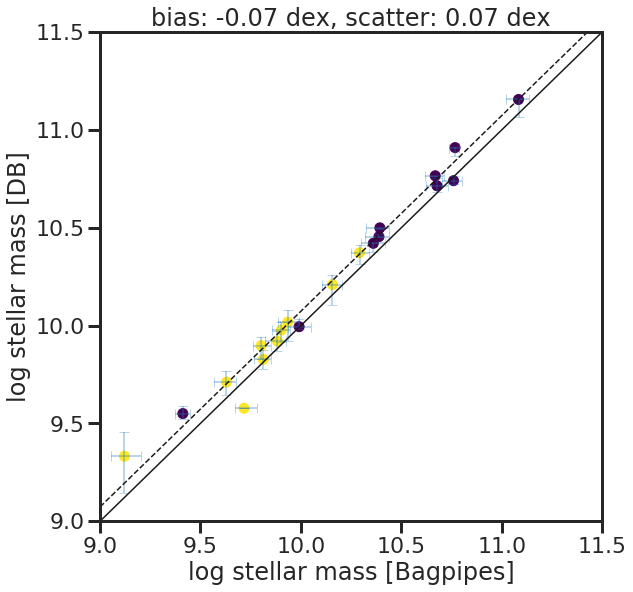

In [8]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['stellar_mass_50']
xerr_lo = bagpipes_fits['stellar_mass_50'] - bagpipes_fits['stellar_mass_16']
xerr_hi = bagpipes_fits['stellar_mass_84'] - bagpipes_fits['stellar_mass_50']
ydata = db_fits['mstar_50']
yerr_lo = db_fits['mstar_50'] - db_fits['mstar_16']
yerr_hi = db_fits['mstar_84'] - db_fits['mstar_50']
xlabel_val = 'log stellar mass [Bagpipes]'
ylabel_val = 'log stellar mass [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_snr30_mass_comparison.png',bbox_inches='tight')

plt.show()

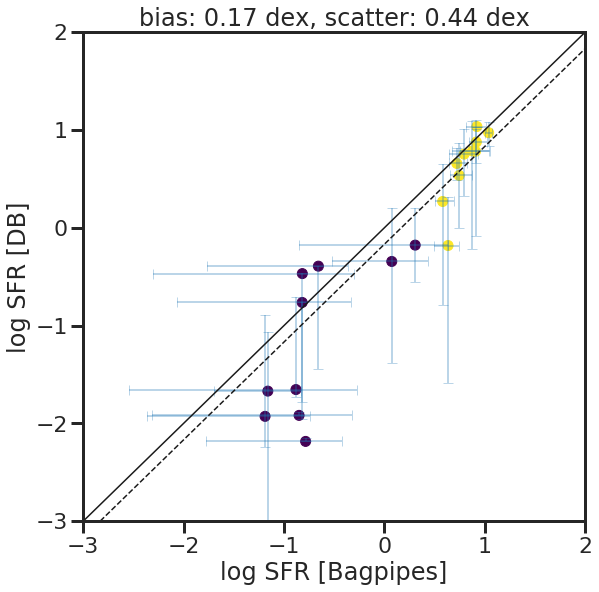

In [9]:

plt.figure(figsize=(9,9))

xdata = np.log10(bagpipes_fits['sfr_50'])
xerr_lo = np.log10(bagpipes_fits['sfr_50']) - np.log10(bagpipes_fits['sfr_16'])
xerr_hi = np.log10(bagpipes_fits['sfr_84']) - np.log10(bagpipes_fits['sfr_50'])
ydata = db_fits['sfr_50']
yerr_lo = db_fits['sfr_50'] - db_fits['sfr_16']
yerr_hi = db_fits['sfr_84'] - db_fits['sfr_50']
xlabel_val = 'log SFR [Bagpipes]'
ylabel_val = 'log SFR [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_snr30_sfr_comparison.png',bbox_inches='tight')

plt.show()

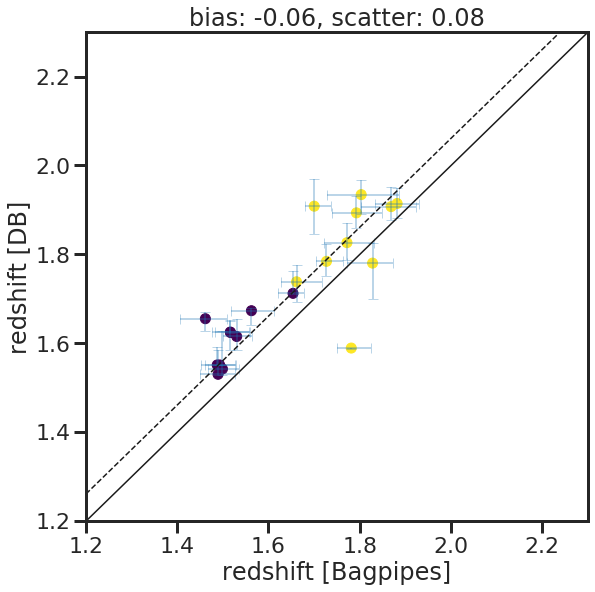

In [10]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['redshift_50']
xerr_lo = bagpipes_fits['redshift_50'] - bagpipes_fits['redshift_16']
xerr_hi = bagpipes_fits['redshift_84'] - bagpipes_fits['redshift_50']
ydata = db_fits['redshift_50']
yerr_lo = db_fits['redshift_50'] - db_fits['redshift_16']
yerr_hi = db_fits['redshift_84'] - db_fits['redshift_50']
xlabel_val = 'redshift [Bagpipes]'
ylabel_val = 'redshift [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_snr30_redshift_comparison.png',bbox_inches='tight')

plt.show()

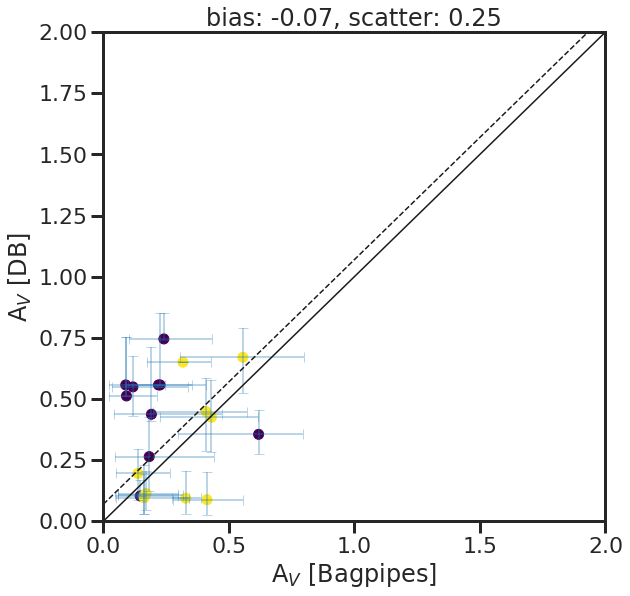

In [11]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['dust:Av_50']
xerr_lo = bagpipes_fits['dust:Av_50'] - bagpipes_fits['dust:Av_16']
xerr_hi = bagpipes_fits['dust:Av_84'] - bagpipes_fits['dust:Av_50']
ydata = db_fits['Av_50']
yerr_lo = db_fits['Av_50'] - db_fits['Av_16']
yerr_hi = db_fits['Av_84'] - db_fits['Av_50']
xlabel_val = 'A$_V$ [Bagpipes]'
ylabel_val = 'A$_V$ [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([0.0,2.0],[0.0,2.0],'k-')
plt.plot([0.0,2.0],[0.0-medbias,2.0-medbias],'k--')
plt.axis([0.0,2.0,0.0,2.0])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_snr30_dust_comparison.png',bbox_inches='tight')

plt.show()

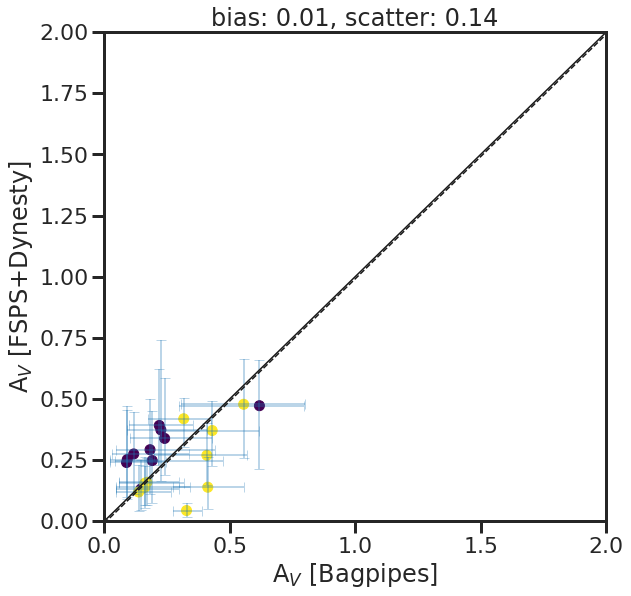

In [12]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['dust:Av_50']
xerr_lo = bagpipes_fits['dust:Av_50'] - bagpipes_fits['dust:Av_16']
xerr_hi = bagpipes_fits['dust:Av_84'] - bagpipes_fits['dust:Av_50']
ydata = gael_fits['dust_50']
yerr_lo = gael_fits['dust_50'] - gael_fits['dust_16']
yerr_hi = gael_fits['dust_84'] - gael_fits['dust_50']
xlabel_val = 'A$_V$ [Bagpipes]'
ylabel_val = 'A$_V$ [FSPS+Dynesty]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([0.0,2.0],[0.0,2.0],'k-')
plt.plot([0.0,2.0],[0.0-medbias,2.0-medbias],'k--')
plt.axis([0.0,2.0,0.0,2.0])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('Gael_Bagpipes_snr30_dust_comparison.png',bbox_inches='tight')

plt.show()

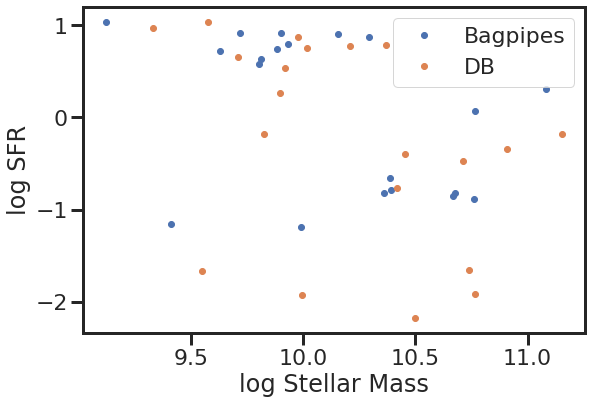

In [13]:
plt.figure(figsize=(9,6))
plt.plot(bagpipes_fits['stellar_mass_50'],np.log10(bagpipes_fits['sfr_50']),'o',label='Bagpipes')
plt.plot(db_fits['mstar_50'],db_fits['sfr_50'],'o',label='DB')
plt.xlabel('log Stellar Mass'); plt.ylabel('log SFR');plt.legend()
plt.show()

# Comparison against truth

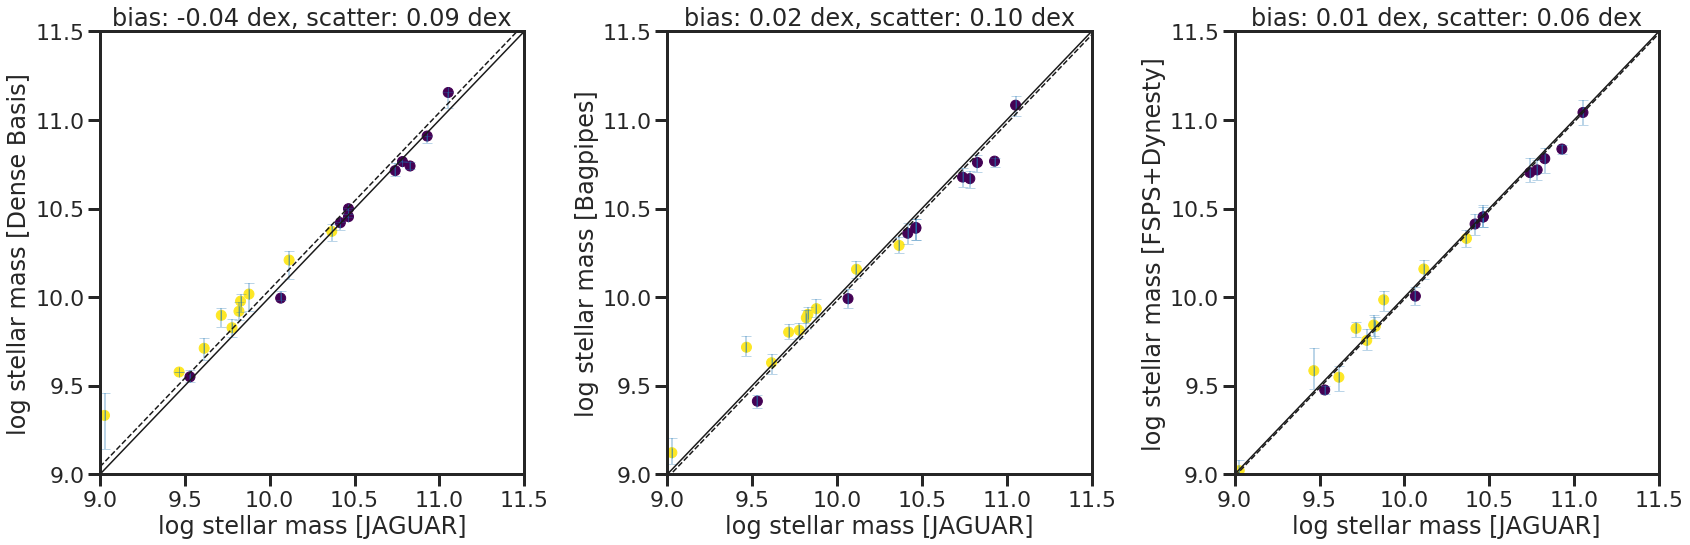

In [14]:
plt.figure(figsize=(24,8.1))
plt.subplot(1,3,1)

xdata = galaxy_params['mStar']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = db_fits['mstar_50']
yerr_lo = db_fits['mstar_50'] - db_fits['mstar_16']
yerr_hi = db_fits['mstar_84'] - db_fits['mstar_50']
xlabel_val = 'log stellar mass [JAGUAR]'
ylabel_val = 'log stellar mass [Dense Basis]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.subplot(1,3,2)

xdata = galaxy_params['mStar']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = bagpipes_fits['stellar_mass_50']
yerr_lo = bagpipes_fits['stellar_mass_50'] - bagpipes_fits['stellar_mass_16']
yerr_hi = bagpipes_fits['stellar_mass_84'] - bagpipes_fits['stellar_mass_50']
xlabel_val = 'log stellar mass [JAGUAR]'
ylabel_val = 'log stellar mass [Bagpipes]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.subplot(1,3,3)

xdata = galaxy_params['mStar']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = gael_fits['stellar_mass_50'] + np.log10(0.6)
yerr_lo = gael_fits['stellar_mass_50'] - gael_fits['stellar_mass_16']
yerr_hi = gael_fits['stellar_mass_84'] - gael_fits['stellar_mass_50']
xlabel_val = 'log stellar mass [JAGUAR]'
ylabel_val = 'log stellar mass [FSPS+Dynesty]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11.5],[9,11.5],'k-')
plt.plot([9,11.5],[9-medbias,11.5-medbias],'k--')
plt.axis([9,11.5,9,11.5])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.tight_layout()
plt.savefig('Jaguar_mass_comparison_snr30.png',bbox_inches='tight')

plt.show()

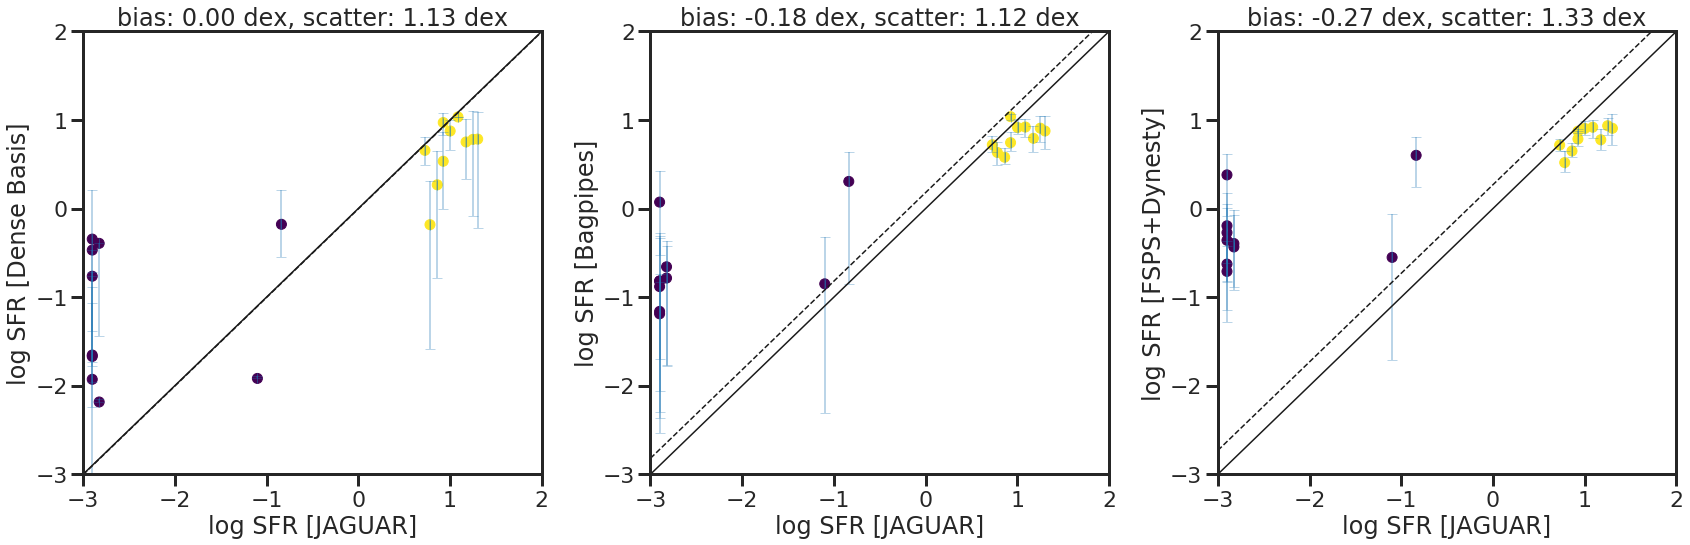

In [15]:
plt.figure(figsize=(24,8.1))
plt.subplot(1,3,1)

xdata = galaxy_params['sSFR'] + galaxy_params['mStar']
xdata[xdata < -2.9] = -2.9
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = db_fits['sfr_50']
yerr_lo = db_fits['sfr_50'] - db_fits['sfr_16']
yerr_hi = db_fits['sfr_84'] - db_fits['sfr_50']
xlabel_val = 'log SFR [JAGUAR]'
ylabel_val = 'log SFR [Dense Basis]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.subplot(1,3,2)

xdata = galaxy_params['sSFR'] + galaxy_params['mStar']
xdata[xdata < -2.9] = -2.9
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = np.log10(bagpipes_fits['sfr_50'])
yerr_lo = np.log10(bagpipes_fits['sfr_50']) - np.log10(bagpipes_fits['sfr_16'])
yerr_hi = np.log10(bagpipes_fits['sfr_84']) - np.log10(bagpipes_fits['sfr_50'])
xlabel_val = 'log SFR [JAGUAR]'
ylabel_val = 'log SFR [Bagpipes]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.subplot(1,3,3)

xdata = galaxy_params['sSFR'] + galaxy_params['mStar']
xdata[xdata < -2.9] = -2.9
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
try:
    ydata = np.log10(gael_fits['sfr100_50'])
    yerr_lo = np.log10(gael_fits['sfr100_50']) - np.log10(gael_fits['sfr100_16'])
    yerr_hi = np.log10(gael_fits['sfr100_84']) - np.log10(gael_fits['sfr100_50'])
except:
    ydata, yerr_lo, yerr_hi = np.zeros_like(xdata)*np.nan, np.zeros_like(xdata), np.zeros_like(xdata)
xlabel_val = 'log SFR [JAGUAR]'
ylabel_val = 'log SFR [FSPS+Dynesty]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.tight_layout()
plt.savefig('Jaguar_sfr_comparison_snr30.png',bbox_inches='tight')

plt.show()

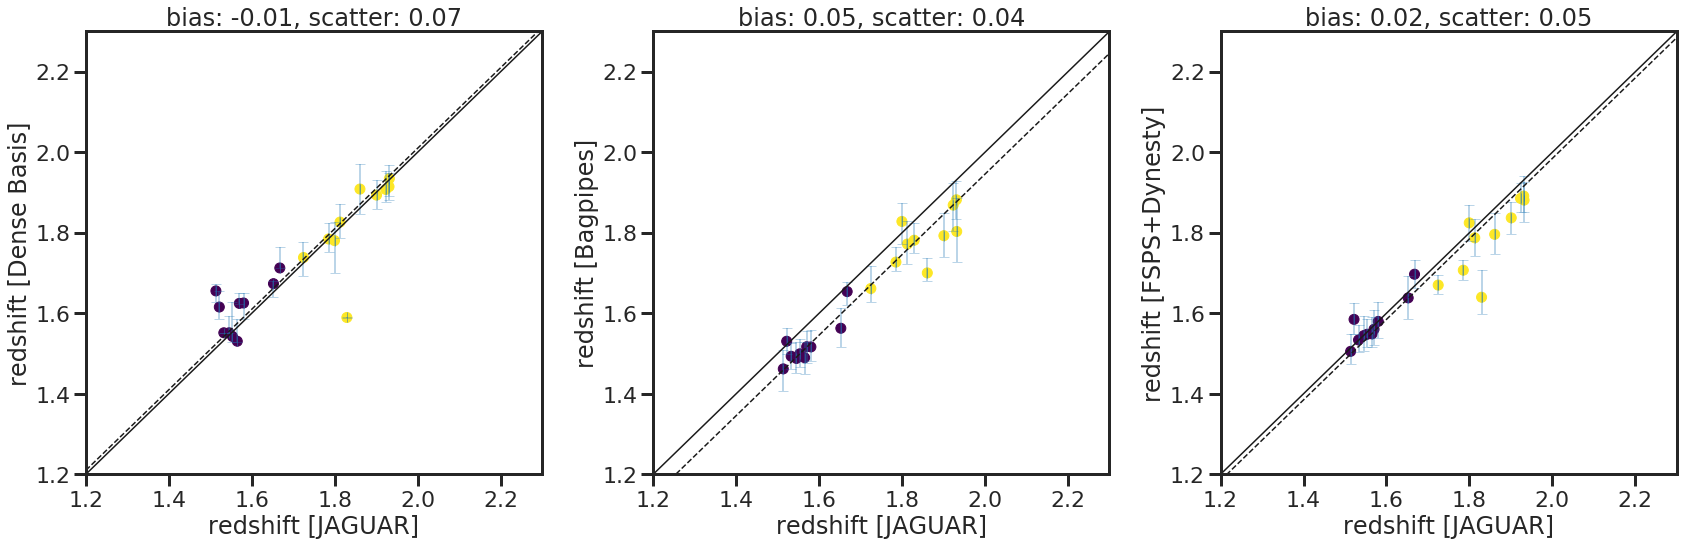

In [16]:

plt.figure(figsize=(24,8.1))
plt.subplot(1,3,1)

xdata = galaxy_params['redshift']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = db_fits['redshift_50']
yerr_lo = db_fits['redshift_50'] - db_fits['redshift_16']
yerr_hi = db_fits['redshift_84'] - db_fits['redshift_50']
xlabel_val = 'redshift [JAGUAR]'
ylabel_val = 'redshift [Dense Basis]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

#plt.savefig('DB_Jaguar_redshift_comparison.png',bbox_inches='tight')


plt.subplot(1,3,2)

xdata = galaxy_params['redshift']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = bagpipes_fits['redshift_50']
yerr_lo = bagpipes_fits['redshift_50'] - bagpipes_fits['redshift_16']
yerr_hi = bagpipes_fits['redshift_84'] - bagpipes_fits['redshift_50']
xlabel_val = 'redshift [JAGUAR]'
ylabel_val = 'redshift [Bagpipes]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.subplot(1,3,3)

xdata = galaxy_params['redshift']
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = gael_fits['redshift_50']
yerr_lo = gael_fits['redshift_50'] - gael_fits['redshift_16']
yerr_hi = gael_fits['redshift_84'] - gael_fits['redshift_50']
xlabel_val = 'redshift [JAGUAR]'
ylabel_val = 'redshift [FSPS+Dynesty]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)


plt.tight_layout()
plt.savefig('Jaguar_redshift_comparison_snr30.png',bbox_inches='tight')

plt.show()

5.171231849385593
4.59970462000941
6.071633240860737


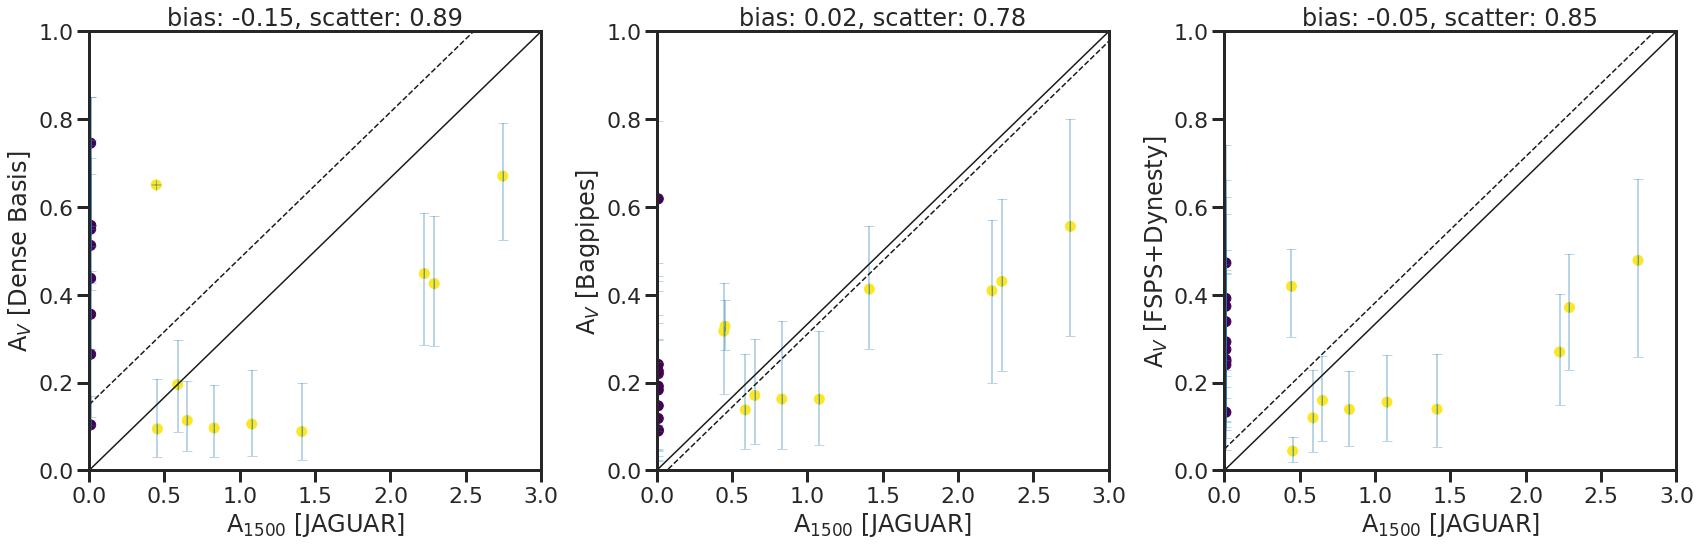

In [17]:
plt.figure(figsize=(24,8.1))
plt.subplot(1,3,1)

xdata = galaxy_params['A1500']
xdata[0:10] = 0.01
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = db_fits['Av_50']
yerr_lo = db_fits['Av_50'] - db_fits['Av_16']
yerr_hi = db_fits['Av_84'] - db_fits['Av_50']
xlabel_val = 'A$_{1500}$ [JAGUAR]'
ylabel_val = 'A$_V$ [Dense Basis]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([0.0,3.0],[0.0,1.0],'k-')
plt.plot([0.0,3.0],[0.0-medbias,1.0-medbias],'k--')
plt.axis([0.0,3.0,0.0,1.0])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)
print(np.nanmedian((xdata/ydata)[10:]))

#plt.savefig('DB_Jaguar_redshift_comparison.png',bbox_inches='tight')


plt.subplot(1,3,2)

xdata = galaxy_params['A1500']
xdata[0:10] = 0.01
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = bagpipes_fits['dust:Av_50']
yerr_lo = bagpipes_fits['dust:Av_50'] - bagpipes_fits['dust:Av_16']
yerr_hi = bagpipes_fits['dust:Av_84'] - bagpipes_fits['dust:Av_50']
xlabel_val = 'A$_{1500}$ [JAGUAR]'
ylabel_val = 'A$_V$ [Bagpipes]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([0.0,3.0],[0.0,1.0],'k-')
plt.plot([0.0,3.0],[0.0-medbias,1.0-medbias],'k--')
plt.axis([0.0,3.0,0.0,1.0])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)
print(np.nanmedian((xdata/ydata)[10:]))

plt.subplot(1,3,3)

xdata = galaxy_params['A1500']
xdata[0:10] = 0.01
xerr_lo = np.zeros_like(xdata)
xerr_hi = np.zeros_like(xdata)
ydata = gael_fits['dust_50']
yerr_lo = gael_fits['dust_50'] - gael_fits['dust_16']
yerr_hi = gael_fits['dust_84'] - gael_fits['dust_50']
xlabel_val = 'A$_{1500}$ [JAGUAR]'
ylabel_val = 'A$_V$ [FSPS+Dynesty]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100,c=colorvals,cmap='viridis')
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([0.0,3.0],[0.0,1.0],'k-')
plt.plot([0.0,3.0],[0.0-medbias,1.0-medbias],'k--')
plt.axis([0.0,3.0,0.0,1.0])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)
print(np.nanmedian((xdata/ydata)[10:]))

plt.tight_layout()
plt.savefig('Jaguar_dust_comparison_snr30.png',bbox_inches='tight')

plt.show()